# Create a map of the F1 circuits

Using the data for the circuits, visualise the maps for each one of them.

In [1]:
# load libraries

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# load data

f1_circuits = gpd.read_file('f1-circuits.geojson')
season_2024 = pd.read_json('championships/f1-locations-2024.json')

In [3]:
# merge with 2024 season data
season_2024_merged = gpd.GeoDataFrame(
    season_2024.merge(
        f1_circuits.drop(columns = ['Location', 'Name']),
        on = 'id',
        how = 'left'
    ),
    geometry = 'geometry'
)

In [14]:
# individual things
# iterate through rows
for idx, row in season_2024_merged.iterrows():
    # get geometry and convert to UTM grid
    geom = gpd.GeoSeries(
        row['geometry'],
        crs = 'EPSG:4326'
    )
    geom = geom.to_crs(geom.estimate_utm_crs())

    # get information
    location = row['location']
    circuit_name = row['name']
    length = row['length']

    # plot

    # initialise plot
    fig, ax = plt.subplots(
        1, 1, figsize = (4, 4),
        facecolor = '#111111'
    )

    # plot geom
    geom.plot(
        color = 'red',
        linewidth = 5,
        ax = ax,
        zorder = 1
    )

    # add text in the center
    ax.annotate(
        location,
        xy = (0.5, 0.5),
        xycoords = 'axes fraction',
        family = 'Eras Bold ITC',
        ha = 'center',  # Horizontal alignment
        va = 'center',  # Vertical alignment
        fontsize = 25,
        color = 'white',
        zorder = 10
    )

    # add text in the bottom
    ax.annotate(
        f'{circuit_name}\nLength: {length:,} m',
        xy = (0, 0),
        xycoords = 'figure fraction',
        family = 'Eras Medium ITC',
        ha = 'left',  # Horizontal alignment
        va = 'bottom',  # Vertical alignment
        fontsize = 12,
        color = 'white',
        zorder = 10
    )

    # square
    ax.set_aspect('equal', adjustable='box')

    # get rid of axis
    plt.axis('off')
    # plt.tight_layout()

    # save figure
    plt.savefig(f'img/{str(idx).zfill(2)}_{location}.png')

    # close figure
    plt.close()


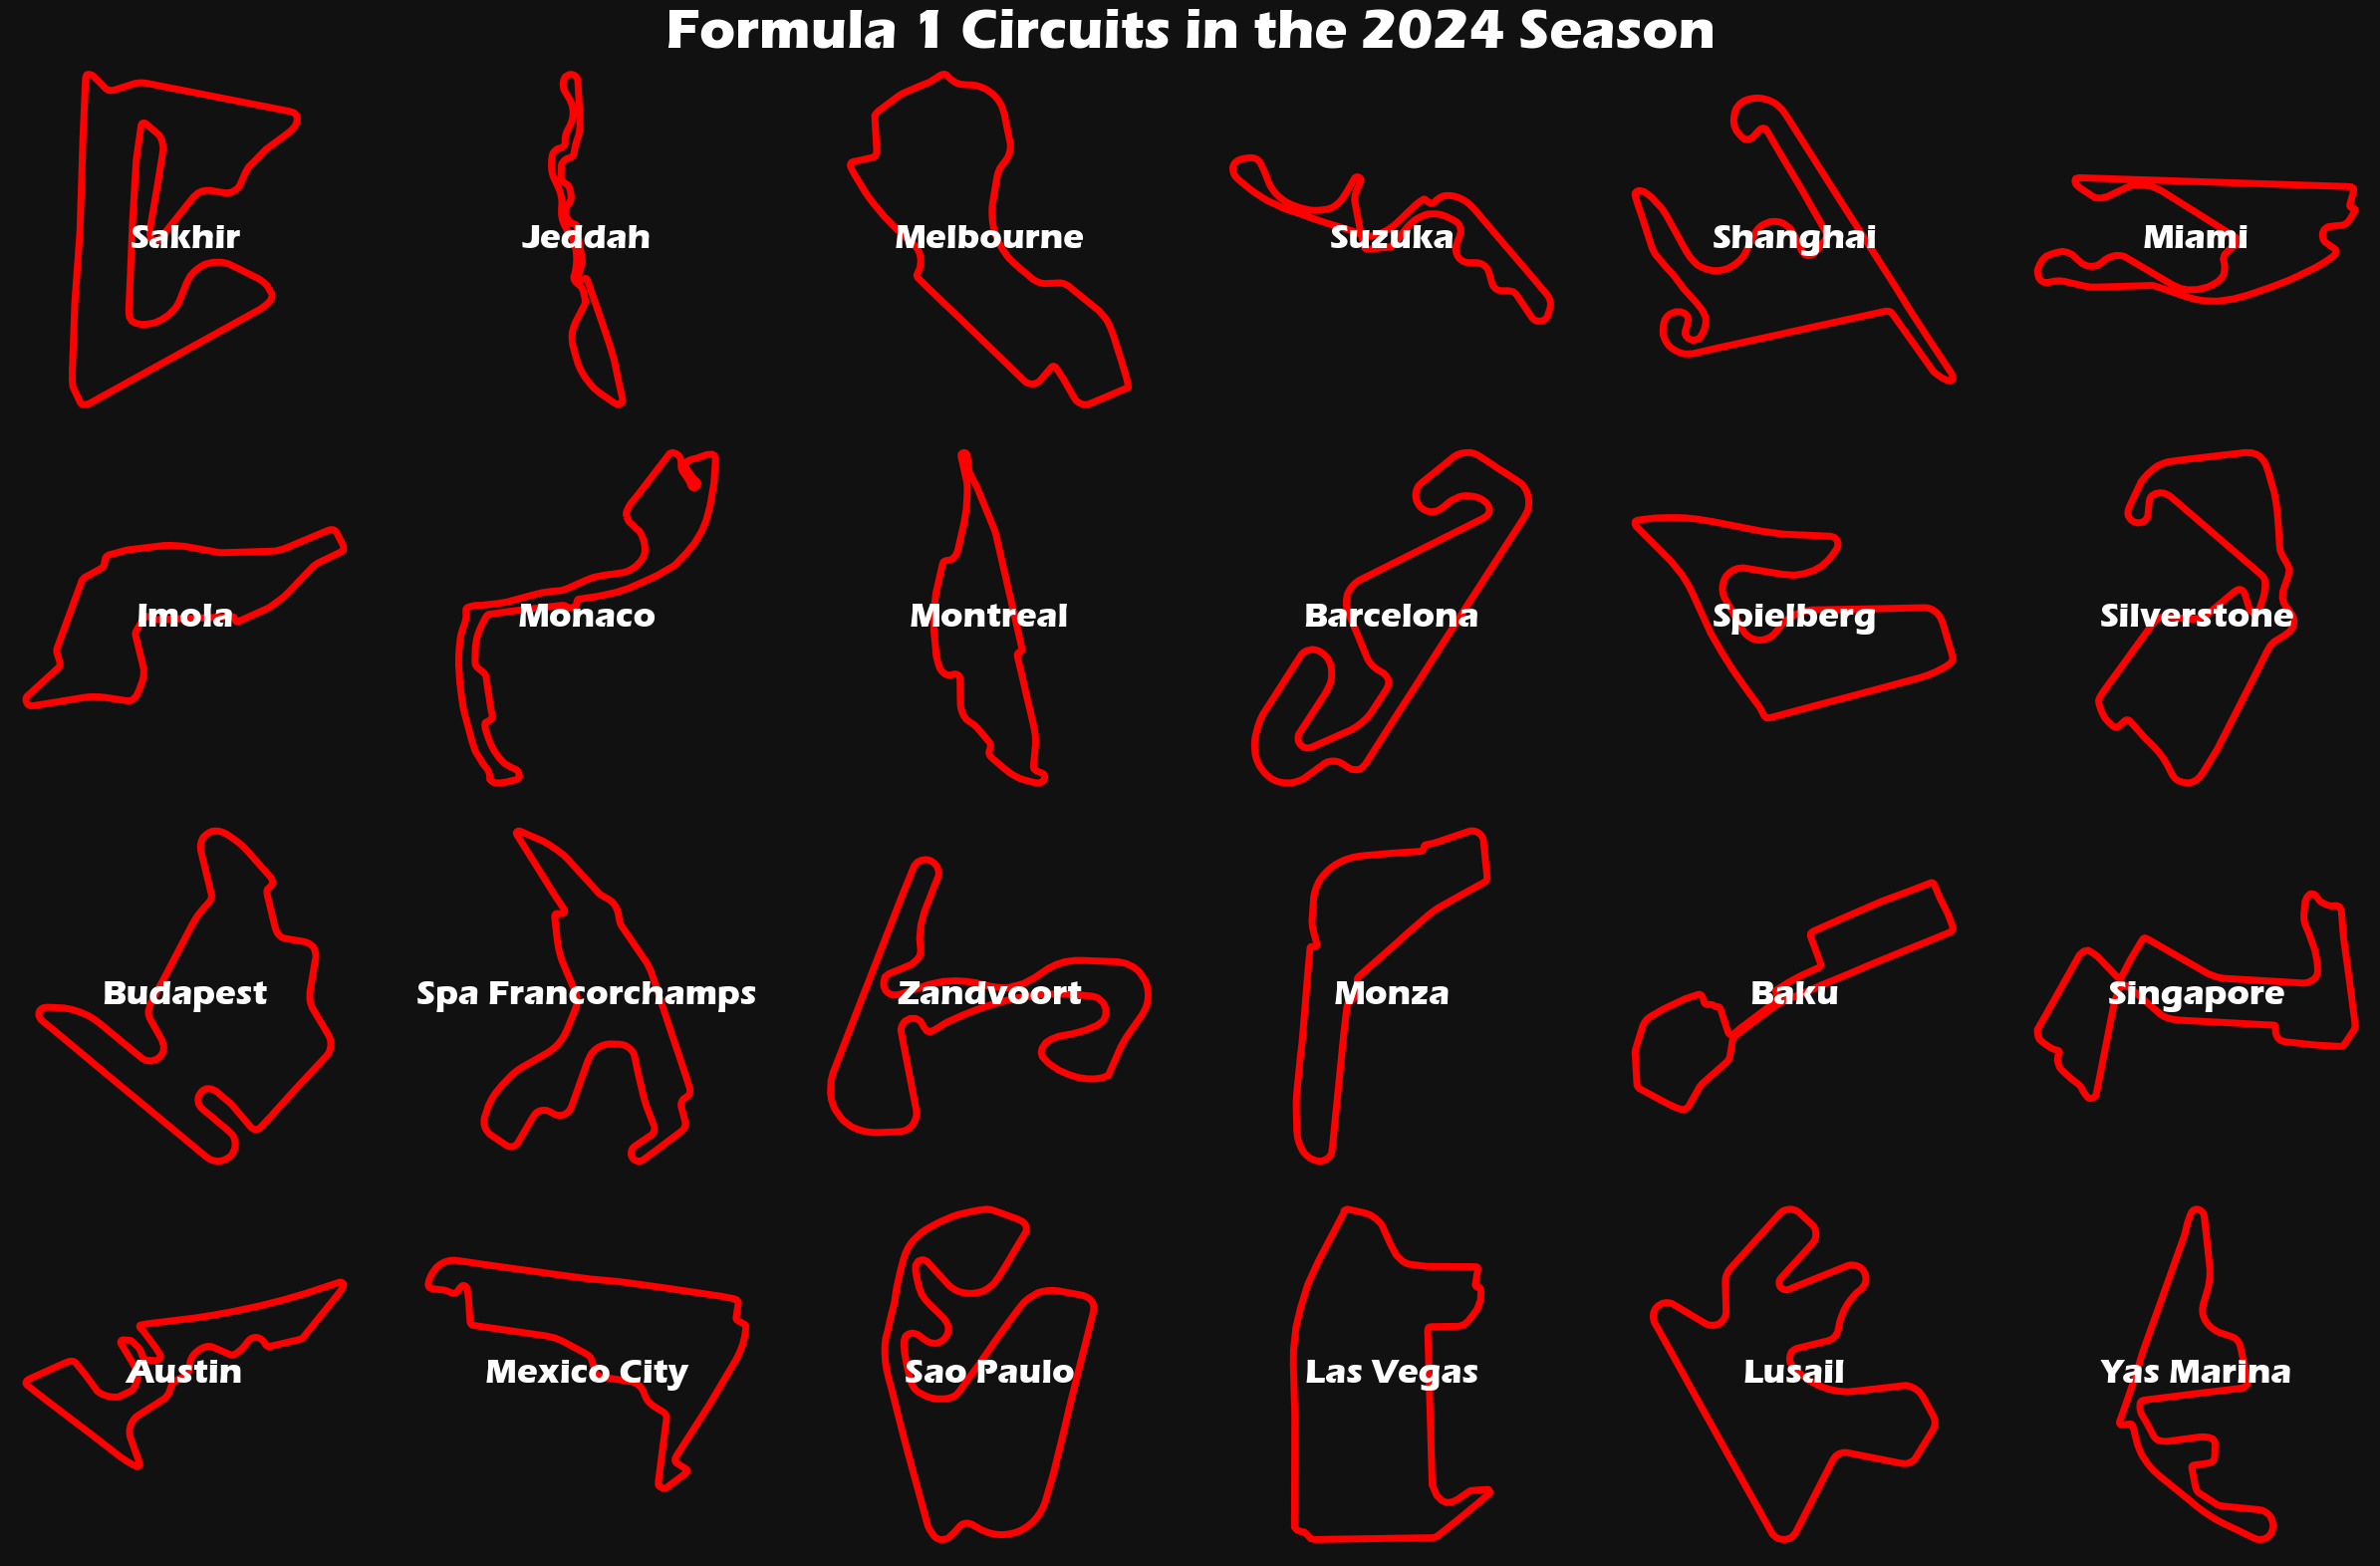

In [5]:
# combined figure
fig, axes = plt.subplots(4, 6, figsize = (24, 16), facecolor = '#111111')

# iterate through rows
for idx, row in season_2024_merged.iterrows():
    # get geometry and convert to UTM grid
    geom = gpd.GeoSeries(
        row['geometry'],
        crs = 'EPSG:4326'
    )
    geom = geom.to_crs(geom.estimate_utm_crs())

    # get information
    location = row['location']
    circuit_name = row['name']
    length = row['length']

    # set axis
    ax = axes[idx // 6, idx % 6]

    # plot geom
    geom.plot(
        color = 'red',
        linewidth = 5,
        ax = ax,
        zorder = 1
    )

    # square
    ax.set_aspect('equal', adjustable='box')

    # remove axis
    ax.set_axis_off()

    # set background
    ax.set_facecolor('#111111')

    # add text in the center
    ax.annotate(
        location,
        xy = (0.5, 0.5),
        xycoords = 'axes fraction',
        family = 'Eras Bold ITC',
        ha = 'center',  # Horizontal alignment
        va = 'center',  # Vertical alignment
        fontsize = 25,
        color = 'white',
        zorder = 10
    )

# add overall title
plt.suptitle('Formula 1 Circuits in the 2024 Season', family = 'Eras Bold ITC', color = 'white', fontsize = 40)

plt.tight_layout()
plt.savefig('img/combined_2024.png')
